In [2]:
#%load_ext autoreload
#%autoreload 2

In [1]:
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

import signal
from time import sleep

from IPython.display import display, clear_output

In [2]:
signal_done = True

def signal_handler(signal, frame):
    global signal_done
    signal_done = True

def stop_on_signal():
    global signal_done
    signal_done = False
    signal.signal(signal.SIGINT, signal_handler)

In [3]:
import life

In [4]:
print(life.ver())

2


In [5]:
def to_array(ss):
    ms = [s for s in [s.strip() for s in ss.split("\n")] if len(s) > 0]
    d = [[False if c == "." else True for c in s] for s in ms]
    return np.array(d)

In [6]:
def show(state, size=None, clear=False):
    if size is not None:
        plt.figure(figsize=size)
    plt.imshow(state, interpolation='nearest')
    if clear:
        clear_output(wait=True)
    plt.show()

def animate(state, n=None, delay=0.2, size=None):
    stop_on_signal()
    while not signal_done:
        if n is not None:
            if n <= 0:
                break
            n -= 1
        show(state, size=size, clear=True)
        state = life.step(state)
        sleep(delay)
    return state

In [7]:
## Random

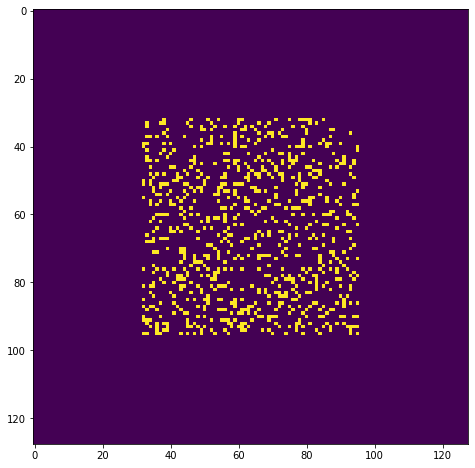

In [8]:
rng = np.random.RandomState(0xDEADBEEF)
data = np.zeros((128, 128), dtype=np.bool)
data[32:(128-32),32:(128-32)] = rng.choice((True, False), size=(64, 64), p=(0.2, 0.8))
show(data, size=(8,8))

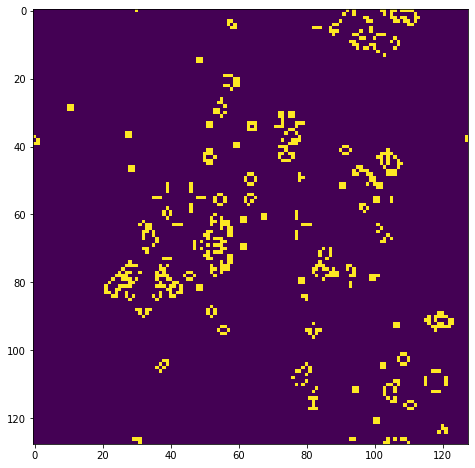

In [ ]:
data = animate(data, delay=0.01, size=(8,8))

In [ ]:
## Blinker

In [ ]:
data = np.zeros((5, 5), dtype=np.bool)
data[2:3,1:4] = 1
show(data)

In [ ]:
_ = animate(data)

In [ ]:
## Toad

In [ ]:
data = np.zeros((6, 6), dtype=np.bool)
data[2:3,2:5] = 1
data[3:4,1:4] = 1
show(data)

In [ ]:
_ = animate(data)

In [9]:
## Glider

In [1]:
data = np.zeros((16, 16), dtype=np.bool)
data[1:4,7:10] = to_array("""
.0.
..0
000
""")
show(data)

NameError: name 'np' is not defined

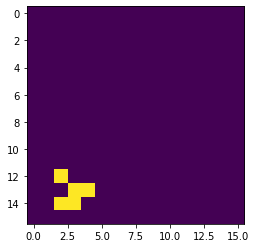

In [ ]:
_ = animate(data)

In [ ]:
## Penta-decathlon (period 15)

In [ ]:
data = np.zeros((18, 11), dtype=np.bool)
data[5:13,4:7] = 1
data[6,5] = 0
data[11,5] = 0
show(data, size=(6,6))

In [ ]:
_ = animate(data, size=(6,6))

In [ ]:
## Glider gun

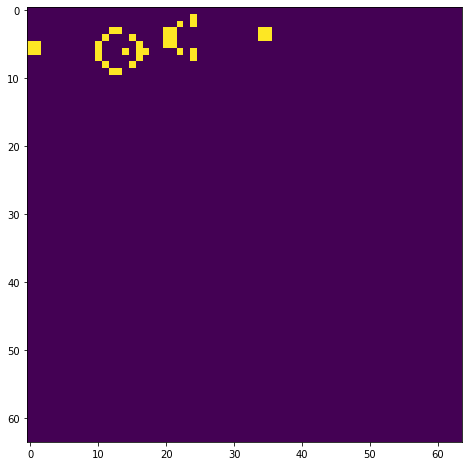

In [9]:
data = np.zeros((64, 64), dtype=np.bool)
data[1:10,0:36] = to_array("""
........................0...........
......................0.0...........
............00......00............00
...........0...0....00............00
00........0.....0...00..............
00........0...0.00....0.0...........
..........0.....0.......0...........
...........0...0....................
............00......................
""")
show(data, size=(8,8))

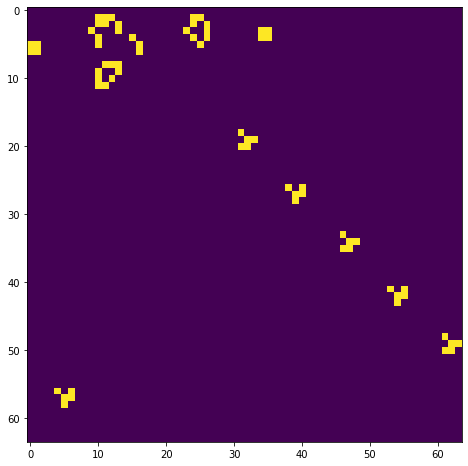

In [ ]:
data = animate(data, size=(8,8), delay=0.05)

In [ ]:
## Infinite growth

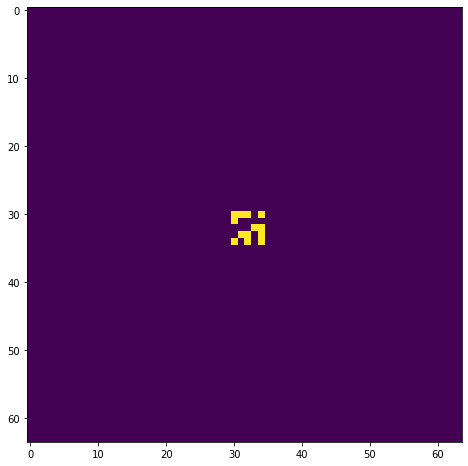

In [7]:
data = np.zeros((64, 64), dtype=np.bool)
data[30:35, 30:35] = to_array("""
000.0
0....
...00
.00.0
0.0.0
""")
show(data, size=(8,8))

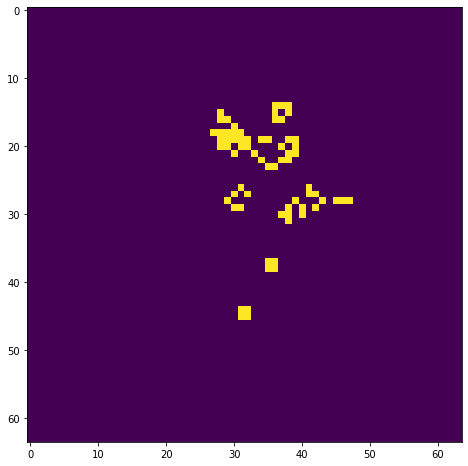

In [ ]:
data = animate(data, size=(8,8), delay=0.001)